# Example script

This simple Jupyter Notebook will exemplify a simple workflow using this library, starting from data fusion and ending with prediction.

## Step zero: install the library (and get the example data)
Let's install the package from `PyPI`.

In [ ]:
%pip install chemfusekit

# Optional: download the example data from the repository (you could upload your own files)
!wget https://github.com/f-aguzzi/tesi/raw/main/tests/qepas.xlsx
!wget https://github.com/f-aguzzi/tesi/raw/main/tests/rt.xlsx

# Automatically inline the graphs
%matplotlib inline

## First step: Low-Level Data Fusion
- the `LLDF` class is used for data fusion
- the `LLDF_Settings` class is a helper class for setting up `LLDF`
- `LLDF` data can then be exported, or used for further processing

In [1]:
from chemfusekit.lldf import LLDFSettings, LLDF, Table, GraphMode

# Initialize the settings for low-level data fusion
# Perform preliminary data fusion
lldf_settings = LLDFSettings(output=GraphMode.NONE)
qepas_table = Table(
    file_path="tests/qepas.xlsx",
    sheet_name="Sheet1",
    preprocessing="snv"
)
rt_table = Table(
    file_path="tests/rt.xlsx",
    sheet_name="Sheet1",
    preprocessing="none"
)

tables = [qepas_table, rt_table]

# Initialize and run low-level data fusion
lldf = LLDF(lldf_settings, tables)
lldf.lldf()

In [ ]:
# (optional) export the LLDF data to an Excel file
lldf.export_data('output_file.xlsx')

## Second step: SVM 

- the `SVM` class provides Support Vector Machine Analysis tools
- the `SVMSettings` helper class holds the settings for the `SVM` class

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

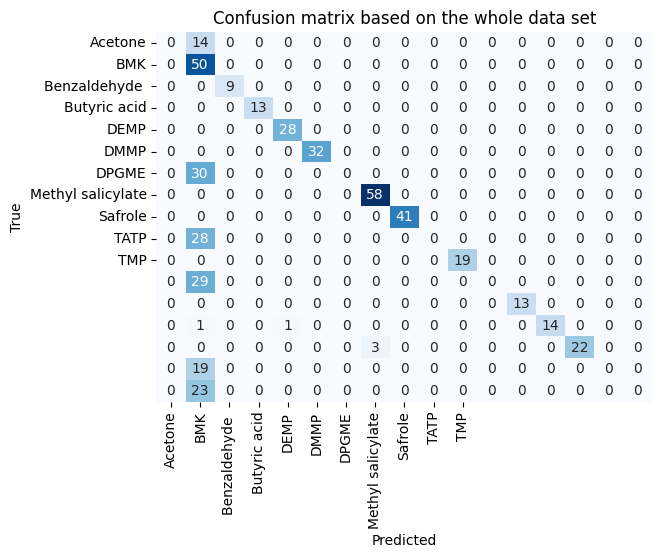

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



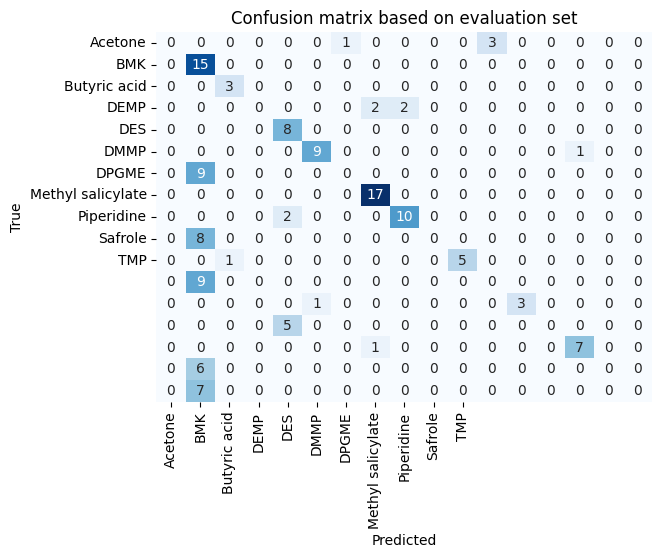

In [2]:
from chemfusekit.svm import SVMSettings, SVM, GraphMode

# Initialize the settings for Principal Component Analysis
svm_settings = SVMSettings(
    kernel='poly',    # Kernel type
    output=GraphMode.GRAPHIC,   # graphs will be printed as pictures
    test_split=True # Split testing will be carried out
)

# Initialize and run the SVM class
svm = SVM(settings=svm_settings, data=lldf.fused_data)
svm.svm()

# Third step: SVM rediction

In [4]:
# Let's pick a random sample and see if it gets recognized correctly:
x_data_sample = lldf.fused_data.x_train.iloc[119] # should be DMMP
x_data_sample = x_data_sample.iloc[1:].to_frame().transpose()

# Let's run the prediction:
predictions = svm.predict(x_data_sample)
print(predictions)

['DMMP']
